In [1]:
import torch
import json
import matplotlib.pyplot as plt

In [2]:
class Json_writer:
    def __init__(self, log_file):
        self.data = {}
        self.log_file = log_file

    def add_scalar(self, tag, value, epoch):
        if torch.is_tensor(value):
            value = value.item()
        if tag in self.data:
            self.data[tag] += [value]
        else:
            self.data[tag] = [value]

    def add_scalars(self, tag, value_dict, epoch):
        if tag in self.data:
            for key, value in value_dict.items():
                if torch.is_tensor(value):
                    value = value.item()
                self.data[tag][key] += [value]
        else:
            self.data[tag] = {}
            for key, value in value_dict.items():
                if torch.is_tensor(value):
                    value = value.item()
                self.data[tag][key] = [value]

    def flush(self):
        with open(self.log_file, "w+") as f:
            json.dump(self.data, f, indent=6)

    def load_data(self, log_file):
        with open(log_file) as f:
            self.data = json.load(f)
        return self

In [3]:
def plot_loss(train_losses, val_losses=None, file_out="output"):
    epochs = range(len(train_losses))
    fig = plt.figure(figsize=(10, 8))
    plt.plot(epochs, train_losses, label="train loss")
    if val_losses is not None:
        plt.plot(epochs, val_losses, label="val loss")
    plt.xlabel("Epochs", fontdict={"size": 12})
    plt.ylabel("Loss", fontdict={"size": 12})
    plt.title("Loss", fontdict={"size": 16})
    plt.legend(prop={"size": 12})
    plt.savefig(file_out)
    plt.show()


def plot_val(scores, labels, y_label="mAP", file_out="output"):
    epochs = range(len(scores[0]))
    fig = plt.figure(figsize=(10, 8))
    for score, label in zip(scores, labels):
        plt.plot(epochs, score, label=label)
    plt.xlabel("Epochs", fontdict={"size": 12})
    plt.ylabel(y_label, fontdict={"size": 12})
    plt.title("Averge Precision", fontdict={"size": 16})
    plt.legend(prop={"size": 12})
    plt.savefig(file_out)
    plt.show()

In [4]:
log_file = r"C:\Users\saibo\Documents\bachelor_project\outputs\2022-04-11\15-28-51\logs\run.json"
writer = Json_writer(log_file=log_file).load_data(log_file=log_file)

In [5]:
loss_train = writer.data['Loss/train']
loss_val = writer.data['Loss/val']
scores = writer.data['Score/val']

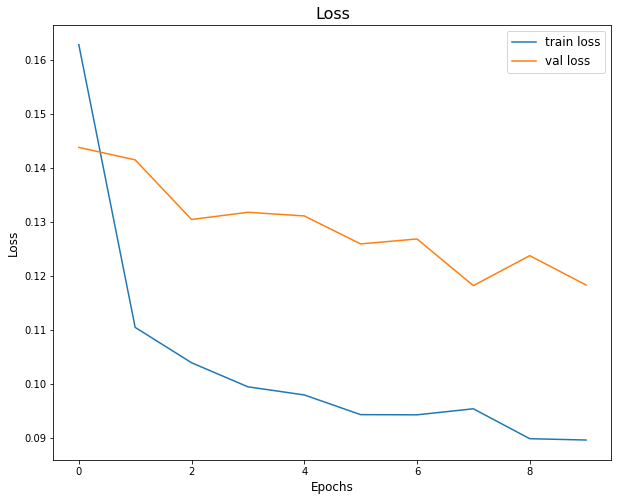

In [6]:
plot_loss(loss_train, loss_val, file_out="../reports/images/default.png")

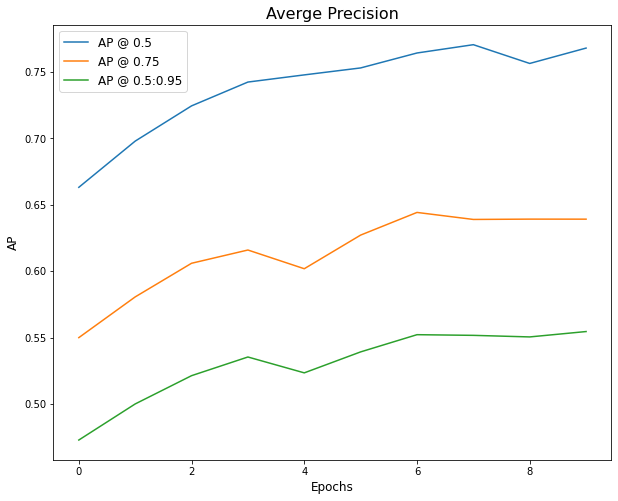

In [7]:
map_50 = scores['map_50']
map_75 = scores['map_75']
map_5095 = scores['map']
labels = ["AP @ 0.5", "AP @ 0.75", "AP @ 0.5:0.95"]
plot_val([map_50, map_75, map_5095], labels, y_label="AP", file_out="../reports/images/default.png")